In [38]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from pathlib import Path
import seaborn as sns
import numpy as np

In [64]:
data = pd.read_csv('C:/Users/m8rqu/Documents/Data BootCamp/Public Housing vs Rent/Data/PublicHousing.csv')
data.head()
# data.drop_duplicates()

,X,Y,OBJECTID,ID,GRANTEE,GRANTEE_TYPE,GRANTEE_ID,IDIS_ACTV_ID,ADDRESS,CITY,STATE,ZIP,LAT,LON,NAME,TOTAL_HOME_FUND,TOTAL_UNITS,TOTAL_HOME_UNITS,COMPLETED_DT,ID_CHAR
0,-75.718449,39.451704,1,9.000000e+14,NEW CASTLE COUNTY,61.0,3774.0,1979,26 W Lake St,Middletown,DE,19709,39.451704,-75.718449,Family Help Expansion FY15,66833.09,4.0,4.0,12/3/2018,9.000000e+14
1,-75.637834,39.378170,2,9.000000e+14,NEW CASTLE COUNTY,61.0,3774.0,2061,994 Blackbird Landing Rd,Townsend,DE,19734,39.378170,-75.637834,Connections Group Home Rehabilitation-FY16,160176.87,18.0,18.0,8/17/2017,9.000000e+14
2,-75.606527,39.717230,3,9.000000e+14,NEW CASTLE COUNTY,61.0,3774.0,2062,223 N Augustine St,Wilmington,DE,19804,39.717230,-75.606527,Arc of Delaware-Group Home Accessibility Upgra...,104255.88,47.0,47.0,9/18/2017,9.000000e+14
3,-75.496550,39.761834,4,9.000000e+14,NEW CASTLE COUNTY,61.0,3774.0,2063,700 River Rd Apt A,Wilmington,DE,19809,39.761834,-75.496550,United Cerebral Palsy of DE-Dartmouth Woods Ac...,80576.19,3.0,3.0,9/18/2017,9.000000e+14
4,-75.697931,39.661431,5,9.000000e+14,NEW CASTLE COUNTY,61.0,3774.0,2067,135 Jeandell Dr,Newark,DE,19713,39.661431,-75.697931,HOME Marydale Retirement Village-FY16,166971.19,3.0,3.0,3/6/2018,9.000000e+14


In [40]:
house = data[['LAT','LON','STATE','CITY','TOTAL_HOME_FUND','TOTAL_HOME_UNITS','COMPLETED_DT']]
house.head()

,LAT,LON,STATE,CITY,TOTAL_HOME_FUND,TOTAL_HOME_UNITS,COMPLETED_DT
0,39.451704,-75.718449,DE,Middletown,66833.09,4.0,12/3/2018
1,39.378170,-75.637834,DE,Townsend,160176.87,18.0,8/17/2017
2,39.717230,-75.606527,DE,Wilmington,104255.88,47.0,9/18/2017
3,39.761834,-75.496550,DE,Wilmington,80576.19,3.0,9/18/2017
4,39.661431,-75.697931,DE,Newark,166971.19,3.0,3/6/2018


In [41]:
house['COMPLETED_DT'] = pd.to_datetime(house['COMPLETED_DT'])
house.set_index('COMPLETED_DT', inplace=True)
house.head()

C:\Users\m8rqu\AppData\Local\Temp\ipykernel_29172\691027787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['COMPLETED_DT'] = pd.to_datetime(house['COMPLETED_DT'])


,LAT,LON,STATE,CITY,TOTAL_HOME_FUND,TOTAL_HOME_UNITS
COMPLETED_DT,,,,,,
2018-12-03,39.451704,-75.718449,DE,Middletown,66833.09,4.0
2017-08-17,39.378170,-75.637834,DE,Townsend,160176.87,18.0
2017-09-18,39.717230,-75.606527,DE,Wilmington,104255.88,47.0
2017-09-18,39.761834,-75.496550,DE,Wilmington,80576.19,3.0
2018-03-06,39.661431,-75.697931,DE,Newark,166971.19,3.0


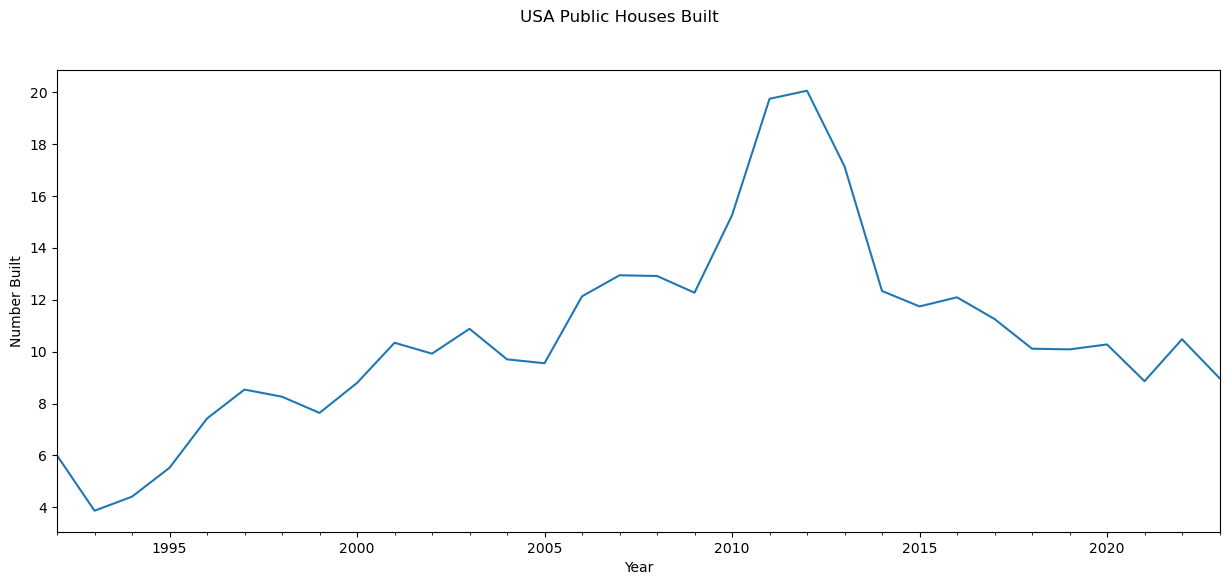

In [42]:
yearly_mean = house.resample('Y').mean()
yearly_mean['TOTAL_HOME_UNITS'].plot(figsize=(15, 6))
plt.suptitle('USA Public Houses Built')
plt.xlabel('Year')
plt.ylabel('Number Built')
plt.show()

In [43]:

data['COMPLETED_DT'] = pd.to_datetime(data['COMPLETED_DT'])

data['Year']=data['COMPLETED_DT'].dt.to_period('Y')
yearly_built = data.groupby(['Year','STATE'])['TOTAL_HOME_UNITS'].sum().reset_index()
yearly_built.head()

,Year,STATE,TOTAL_HOME_UNITS
0,1992,NC,1.0
1,1992,PA,11.0
2,1993,AL,56.0
3,1993,AR,8.0
4,1993,CA,155.0


In [44]:
# file_path_1 = 'C:/Users/m8rqu/Documents/Data BootCamp/Public Housing vs Rent/Data/housing_built.csv'
# yearly_built.to_csv(file_path_1,index = False)


In [45]:
data_1 = pd.read_csv('C:/Users/m8rqu/Documents/Data BootCamp/Public Housing vs Rent/Data/usa_house_price.csv')
data_1.head()


,category,Median Home Price (NSA),CPI-Adjusted Price
0,Thu Jan 15 1953,18080.26,209206.96
1,Sun Feb 15 1953,18080.26,209996.42
2,Sun Mar 15 1953,18080.26,209206.96
3,Wed Apr 15 1953,18122.25,209692.83
4,Fri May 15 1953,18143.25,209149.54


In [46]:
data_1['category'] = pd.to_datetime(data_1['category'])
data_1.set_index('category', inplace=True)

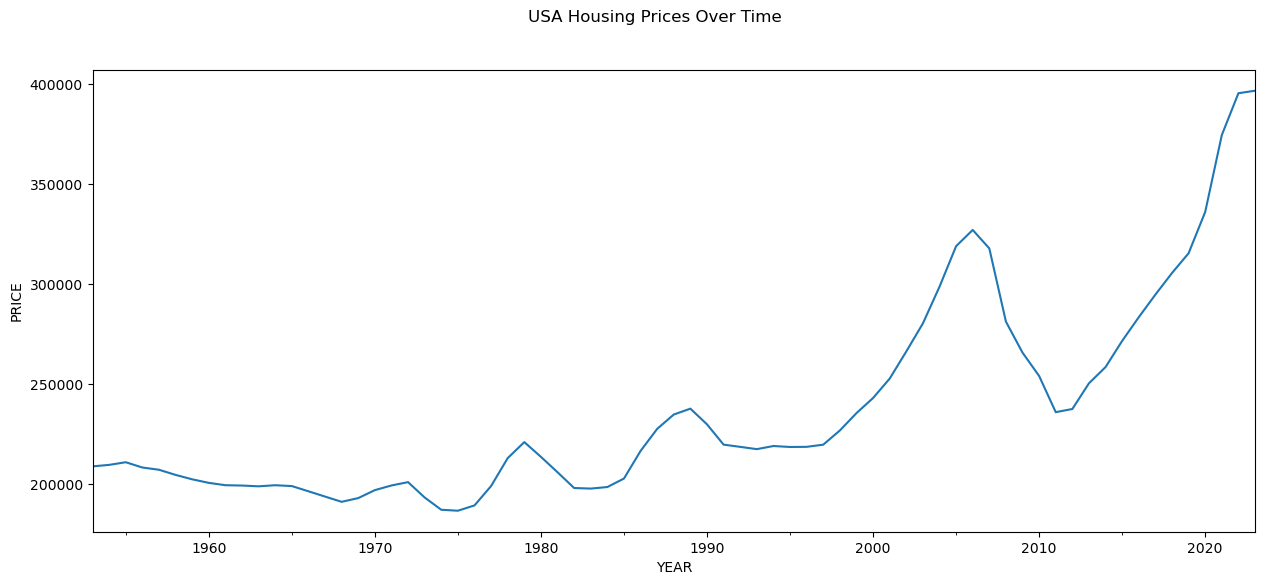

In [47]:
yearly_mean = data_1.resample('Y').mean()
yearly_mean['CPI-Adjusted Price'].plot(figsize=(15, 6))
plt.suptitle('USA Housing Prices Over Time')
plt.xlabel('YEAR')
plt.ylabel('PRICE')
plt.show()

In [48]:
house_1992 = yearly_mean.loc['1992-01-01':]
house_1992


,Median Home Price (NSA),CPI-Adjusted Price
category,,
1992-12-31,99647.295000,218581.430833
1993-12-31,102058.125000,217442.118333
1994-12-31,105469.325000,219004.821667
1995-12-31,108192.519167,218526.055000
1996-12-31,111395.477500,218592.319167
1997-12-31,114568.799167,219678.215833
1998-12-31,120108.898333,226772.821667
1999-12-31,127443.904167,235464.800833
2000-12-31,135978.716667,243022.985833


In [49]:
yearly_total_built = yearly_built.groupby(['Year'])['TOTAL_HOME_UNITS'].sum().reset_index()
yearly_total_built

,Year,TOTAL_HOME_UNITS
0,1992,12.0
1,1993,1432.0
2,1994,4518.0
3,1995,7867.0
4,1996,10518.0
5,1997,11081.0
6,1998,15721.0
7,1999,21905.0
8,2000,15439.0
9,2001,19986.0


The correlation is: -0.15



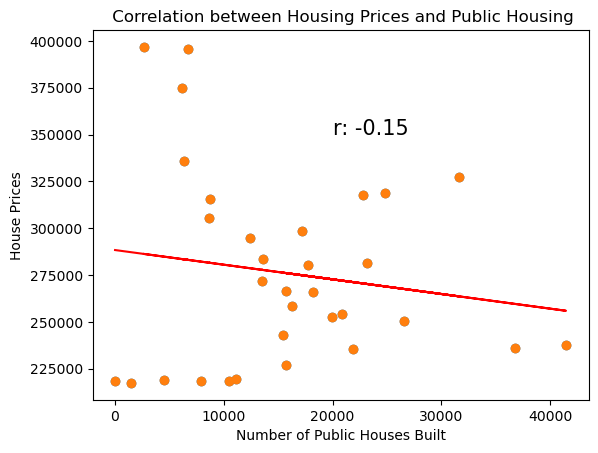

In [50]:
import scipy.stats as st
from scipy.stats import linregress
import statsmodels.formula.api as smf

# Plot out correlation
x_values = yearly_total_built['TOTAL_HOME_UNITS']
y_values = house_1992['CPI-Adjusted Price']
plt.scatter(x_values,y_values)
plt.title(" Correlation between Housing Prices and Public Housing")
plt.xlabel('Number of Public Houses Built')
plt.ylabel('House Prices')

# Print out the r-squared value along with the plot.
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(100,60),fontsize=15,color="red")

rvalue_rounded = round(rvalue, 2)
plt.annotate(f"r: {rvalue_rounded}",(20000,350000),fontsize=15, color = "black")
print(f"The correlation is: {rvalue_rounded}")
print(f"")
plt.show()

In [61]:
# house = data[['LAT','LON','STATE','CITY','TOTAL_HOME_FUND','TOTAL_HOME_UNITS','COMPLETED_DT']]
mapping_data = house[['LAT','LON','TOTAL_HOME_UNITS']]


In [62]:
file_path_2 = 'C:/Users/m8rqu/Documents/Data BootCamp/Public Housing vs Rent/Data/housing_location.csv'
mapping_data.to_csv(file_path_2,index = True)